In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

dataset=pd.read_csv('E:/Boothcamp/Data_Negara_HELP.csv',index_col='Negara')

dataset.head()




,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
dataset.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kematian_anak     167 non-null    float64
 1   Ekspor            167 non-null    float64
 2   Kesehatan         167 non-null    float64
 3   Impor             167 non-null    float64
 4   Pendapatan        167 non-null    int64  
 5   Inflasi           167 non-null    float64
 6   Harapan_hidup     167 non-null    float64
 7   Jumlah_fertiliti  167 non-null    float64
 8   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


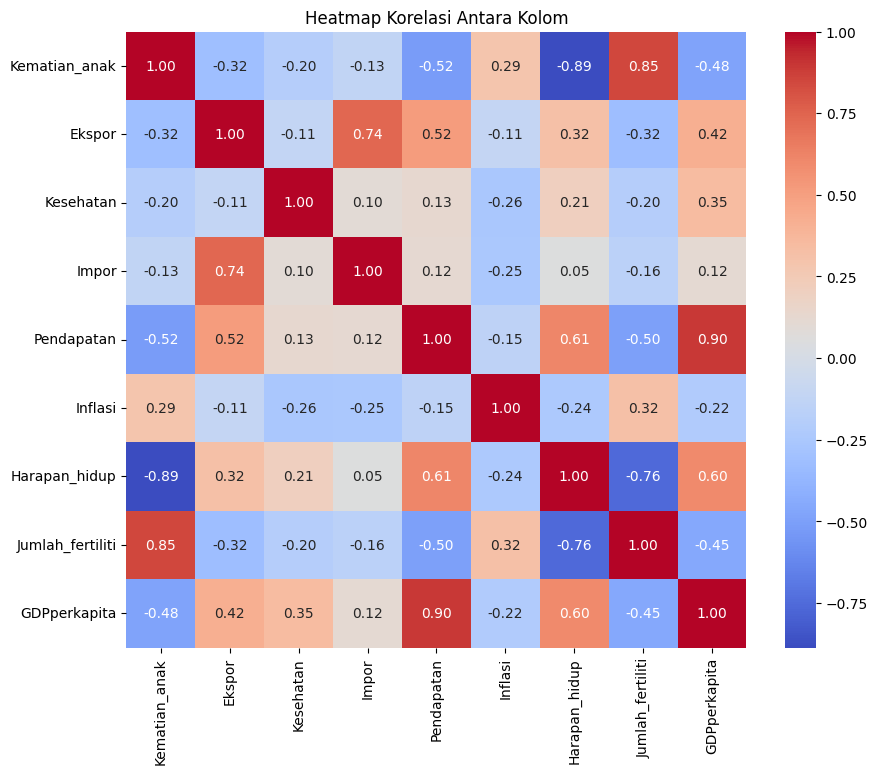

In [49]:
# mencari relasi antar colom

correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom')
plt.show()

# saya memutuskan menganalisa kolom harapan hidup & pendapatan

# alasannya adalah : Harapan Hidup merupakan jumlah rata-rata usia yang diperkirakan pada seseorang atas dasar angka kematian pada masa tersebut yang cenderung tidak berubah di masa mendatang.
#  Angka Harapan Hidup merupakan sarana evaluasi kinerja pemerintah dalam meningkatkan kesejahteraan penduduk pada umumnya di suatu negara.

# Angka harapan hidup dapat dipengaruhi oleh keadaan lingkungan, ketersediaan pangan, pendidikan, kebijakan pemerintah maupun perekonomian masyarakat dan sebagainya. 
# Peningkatan harapan hidup disebabkan karena hidup yang lebih baik, pencegahan serta perawatan ibu, meningkatnya pendidikan dan pendapatan perkapita.

In [50]:
# finding missing values

dataset.isnull().sum()

# hasilnya tidak ada missing values

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [51]:
# finding outliers

def get_lower_upper_bound(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr= q3-q1
    lower_bound = q1-(iqr*1.5)
    upper_bound = q3+(iqr*1.5)
    return lower_bound,upper_bound 

def get_outliers_iqr(x):
    lower_bound,upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound)|( x<lower_bound))]

print('lower & upper bound Harapan_hidup : ',get_lower_upper_bound(dataset['Harapan_hidup'].values))
print('outlier Harapan_hidup : ',get_outliers_iqr(dataset['Harapan_hidup'].values))

print('lower & upper bound Pendapatan : ',get_lower_upper_bound(dataset['Pendapatan'].values))
print('outlier Pendapatan : ',get_outliers_iqr(dataset['Pendapatan'].values))

lower & upper bound Harapan_hidup :  (48.05, 94.05)
outlier Harapan_hidup :  [47.5 32.1 46.5]
lower & upper bound Pendapatan :  (-25812.5, 51967.5)
outlier Pendapatan :  [ 80600  75200  91700  62300 125000  72100  55500  57600]


<Axes: xlabel='Harapan_hidup'>

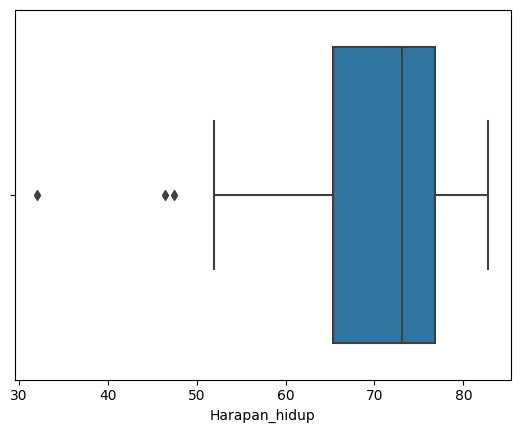

In [52]:
sns.boxplot(x= 'Harapan_hidup',data=dataset)


<Axes: xlabel='Pendapatan'>

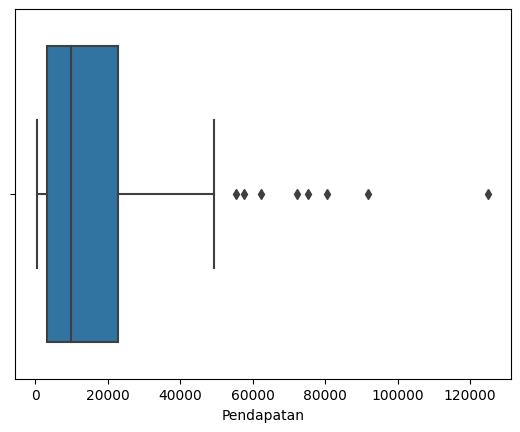

In [53]:
sns.boxplot(x= 'Pendapatan',data=dataset)

In [78]:
# handling outliers

def remove_outlier_IQR(df) :
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    df_final=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    return df_final

df_outliers_remove=remove_outlier_IQR(dataset[['Harapan_hidup','Pendapatan']])

df_outliers_remove.dropna(axis=0,inplace=True)

# data ouliers akan menjadi nan maka dari itu kita drop na

print(df_outliers_remove)



                     Harapan_hidup  Pendapatan
Negara                                        
Afghanistan                   56.2      1610.0
Albania                       76.3      9930.0
Algeria                       76.5     12900.0
Angola                        60.1      5900.0
Antigua and Barbuda           76.8     19100.0
...                            ...         ...
Vanuatu                       63.0      2950.0
Venezuela                     75.4     16500.0
Vietnam                       73.1      4490.0
Yemen                         67.5      4480.0
Zambia                        52.0      3280.0

[156 rows x 2 columns]


In [79]:
# memastikan kembali hasil handling outliers

# mengecek melalui isnull
df_outliers_remove.isnull().sum()

print(df_outliers_remove)




                     Harapan_hidup  Pendapatan
Negara                                        
Afghanistan                   56.2      1610.0
Albania                       76.3      9930.0
Algeria                       76.5     12900.0
Angola                        60.1      5900.0
Antigua and Barbuda           76.8     19100.0
...                            ...         ...
Vanuatu                       63.0      2950.0
Venezuela                     75.4     16500.0
Vietnam                       73.1      4490.0
Yemen                         67.5      4480.0
Zambia                        52.0      3280.0

[156 rows x 2 columns]


<Axes: xlabel='Harapan_hidup'>

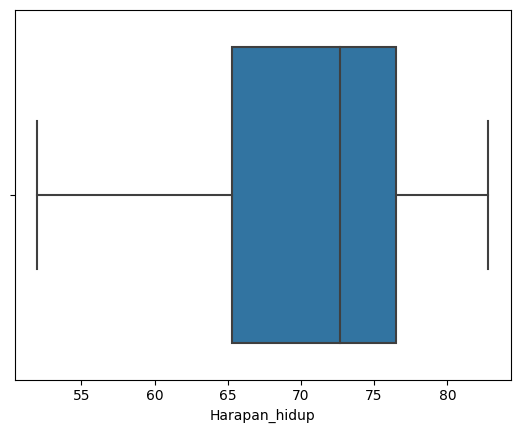

In [56]:
# mengecek melalui boxplot
sns.boxplot(x='Harapan_hidup',data=df_outliers_remove)

<Axes: xlabel='Pendapatan'>

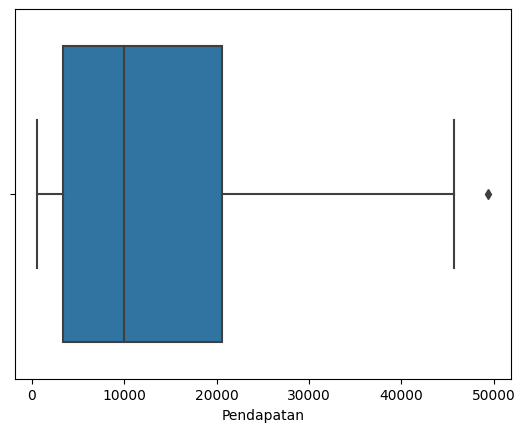

In [57]:
sns.boxplot(x='Pendapatan',data=df_outliers_remove)

In [80]:
def get_lower_upper_bound(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr= q3-q1
    lower_bound = q1-(iqr*1.5)
    upper_bound = q3+(iqr*1.5)
    return lower_bound,upper_bound 

def get_outliers_iqr(x):
    lower_bound,upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound)|( x<lower_bound))]

print('lower & upper bound Harapan_hidup : ',get_lower_upper_bound(df_outliers_remove['Harapan_hidup'].values))
print('outlier Harapan_hidup : ',get_outliers_iqr(df_outliers_remove['Harapan_hidup'].values))

print('lower & upper bound Pendapatan : ',get_lower_upper_bound(df_outliers_remove['Pendapatan'].values))
print('outlier Pendapatan : ',get_outliers_iqr(df_outliers_remove['Pendapatan'].values))

print(df_outliers_remove)

lower & upper bound Harapan_hidup :  (48.462499999999984, 93.36250000000001)
outlier Harapan_hidup :  []
lower & upper bound Pendapatan :  (-22456.25, 46393.75)
outlier Pendapatan :  [49400.]
                     Harapan_hidup  Pendapatan
Negara                                        
Afghanistan                   56.2      1610.0
Albania                       76.3      9930.0
Algeria                       76.5     12900.0
Angola                        60.1      5900.0
Antigua and Barbuda           76.8     19100.0
...                            ...         ...
Vanuatu                       63.0      2950.0
Venezuela                     75.4     16500.0
Vietnam                       73.1      4490.0
Yemen                         67.5      4480.0
Zambia                        52.0      3280.0

[156 rows x 2 columns]


c:\Users\delta05\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     Harapan_hidup  Pendapatan  label_kmeans
0        -1.819188   -0.968447             1
1         0.714906   -0.335927             0
2         0.740121   -0.110135             0
3        -1.327498   -0.642304             1
4         0.777943    0.361214             0
..             ...         ...           ...
151      -0.961883   -0.866575             1
152       0.601439    0.163552             0
153       0.311468   -0.749498             1
154      -0.394548   -0.750258             1
155      -2.348701   -0.841487             1

[156 rows x 3 columns]


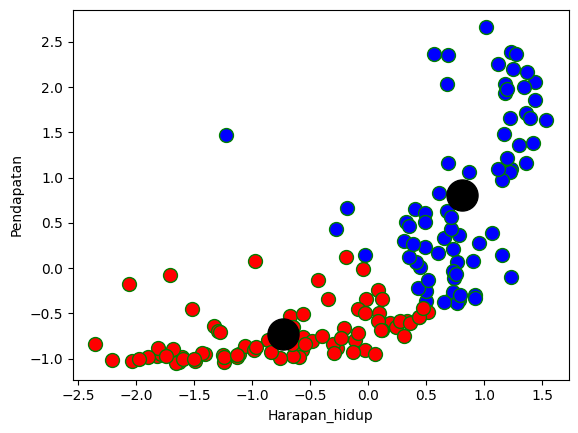

In [81]:
# scaling data

sc=StandardScaler()
dfoutlier_std=sc.fit_transform(df_outliers_remove.astype(float))

kmeans1=KMeans(n_clusters=2,random_state=42).fit(dfoutlier_std)

# kmeans1 = KMeans(n_clusters=5, n_init=10)
# kmeans.fit(data)

labels1= kmeans1.labels_

new_dfoutlier_std=pd.DataFrame(data=dfoutlier_std,columns=['Harapan_hidup','Pendapatan'])
new_dfoutlier_std['label_kmeans']=labels1

print (new_dfoutlier_std)

plt.scatter(new_dfoutlier_std.Harapan_hidup[new_dfoutlier_std.label_kmeans==0],new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans==0],c='blue',s=100,edgecolors='green',linestyle='-')
plt.scatter(new_dfoutlier_std.Harapan_hidup[new_dfoutlier_std.label_kmeans==1],new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans==1],c='red',s=100,edgecolors='green',linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=500);
plt.xlabel('Harapan_hidup')
plt.ylabel('Pendapatan')
plt.show()

c:\Users\delta05\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delta05\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delta05\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delta05\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

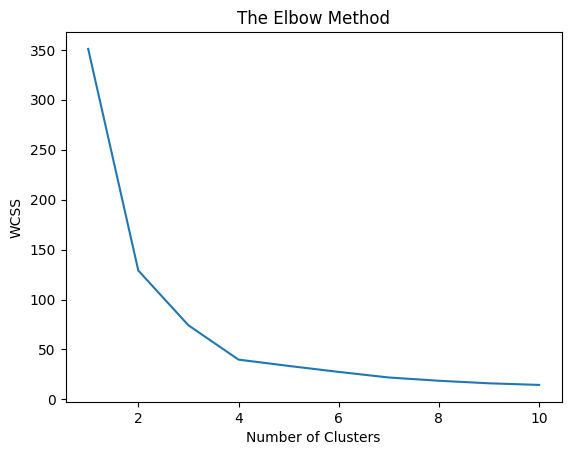

In [60]:
# elbow method

wcss=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters= i,init='k-means++',random_state=42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

elbow method menunjukkan angka 4

In [61]:
# menggunakan 4 cluster

kmeans2=KMeans(n_clusters=4,init='k-means++',random_state=42).fit(dfoutlier_std)
kmeans2.labels_

c:\Users\delta05\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 2, 2, 3, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 3, 0, 0, 2, 3,
       2, 2, 3, 3, 0, 3, 1, 0, 3, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1, 1, 1, 2,
       2, 0, 2, 2, 3, 2, 0, 1, 1, 0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 0, 2, 1,
       0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 3, 3, 0, 0, 2, 2, 3, 1, 2, 2, 3,
       3, 2, 2, 3, 1, 0, 2, 0, 0, 0, 2, 0, 3, 0, 3, 0, 1, 1, 3, 3, 1, 0,
       2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 3, 2, 1, 3, 3, 1, 1, 2,
       0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 2, 2, 0, 3, 0, 1, 1, 2, 0, 3, 2, 0,
       0, 3])

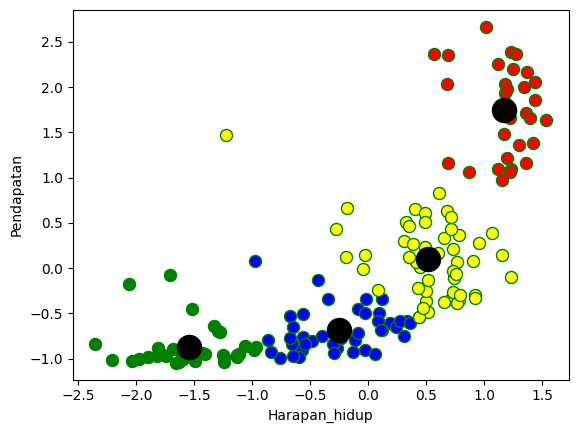

In [143]:
labels2= kmeans2.labels_


new_dfoutlier_std['label_kmeans']=labels2



plt.scatter(new_dfoutlier_std.Harapan_hidup[new_dfoutlier_std.label_kmeans==0],new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans==0],c='blue',s=75,edgecolors='green',linestyle='-')
plt.scatter(new_dfoutlier_std.Harapan_hidup[new_dfoutlier_std.label_kmeans==1],new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans==1],c='red',s=75,edgecolors='green',linestyle='-')
plt.scatter(new_dfoutlier_std.Harapan_hidup[new_dfoutlier_std.label_kmeans==2],new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans==2],c='yellow',s=75,edgecolors='green',linestyle='-')
plt.scatter(new_dfoutlier_std.Harapan_hidup[new_dfoutlier_std.label_kmeans==3],new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans==3],c='green',s=75,edgecolors='green',linestyle='-')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=300);
plt.xlabel('Harapan_hidup')
plt.ylabel('Pendapatan')
plt.show()

In [232]:


# print(new_dfoutlier_std)

df2=df_outliers_remove.reset_index()



df3=new_dfoutlier_std.drop(['Harapan_hidup','Pendapatan'],axis=1)

# print(df3)


list=[df2,df3] 




gab=pd.concat(list,axis=1)

negara_label3=gab[gab['label_kmeans']==3]

# print(dataset)
dataset3=dataset.reset_index()
# print(dataset3)

kesehatan=(dataset3[['Negara','Kematian_anak',]])

# print(kesehatan)




df4=negara_label3[['Negara','Harapan_hidup','Pendapatan']]

# print (df4)

result_df = pd.merge(df4, kesehatan, on='Negara', how='left')
# print(result_df)


sorted_df = result_df.sort_values(by=['Harapan_hidup'])


print(sorted_df.head(10))

sorted_df.describe()










           Negara  Harapan_hidup  Pendapatan  Kematian_anak
32         Zambia           52.0      3280.0           83.1
19         Malawi           53.1      1030.0           90.5
27   South Africa           54.3     12000.0           53.7
21     Mozambique           54.5       918.0          101.0
25   Sierra Leone           55.0      1220.0          160.0
14  Guinea-Bissau           55.6      1390.0          114.0
0     Afghanistan           56.2      1610.0           90.2
10  Cote d'Ivoire           56.3      2690.0          111.0
7            Chad           56.5      1930.0          150.0
30         Uganda           56.8      1540.0           81.0


,Harapan_hidup,Pendapatan,Kematian_anak
count,33.00000,33.000000,33.000000
mean,58.40000,2896.212121,90.766667
std,2.84616,3039.035227,32.658820
min,52.00000,609.000000,28.100000
25%,56.50000,1220.000000,62.700000
50%,58.60000,1780.000000,90.300000
75%,60.70000,2950.000000,114.000000
max,63.00000,13300.000000,160.000000
